#This is the main ipynb notebook
based on the py files in /../src_class

# Notes to myself:
The so-called 'offset' seems to be acting weird... Offset indeed shifts <br>
- Offset does not move over the same bin assignment; but moves when changing the assignment??(need to check; if true, offset will indeed change if unused bins are assigned as well). Peculair thing is, the start bin part is not even changed in the next bin assignments - yet they are not tapped.
- Non-zero population at 0 always ?? <br>
- All these problems appear only after POR1

Done:
- First POR and all that are all good <br>
- Need to reconsider chopping for the Start and End cell.. (especially the End Cell) <br>
- Assigning the logical bins for the start cell correctly <br>
- Offset Change handling <br>

# Imports
from `__init__.py`

In [1]:
from google.colab import files, drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import importlib
import os
import sys

parent_dir = "/content/drive/MyDrive/TTMU_Colab_Notebooks/Calibrations/src_class"
sys.path.append(parent_dir)

import utils
import Cell_Class
import TDL_Class
import UniqueHistory_Class
import read_and_print
import initialize
import ITI


## Reloads

In [ ]:
# Reload modules
importlib.reload(utils)
importlib.reload(Cell_Class)
importlib.reload(TDL_Class)
importlib.reload(UniqueHistory_Class)
importlib.reload(read_and_print)
importlib.reload(initialize)
importlib.reload(ITI)

# # Re-import all functions explicitly
# from utils import *
# from Cell_Class import *
# from TDL_Class import *

# from UniqueHistory_Class import *
# from read_and_print import *
# from initialize import *


<module 'initialize' from '/content/drive/MyDrive/TTMU_Colab_Notebooks/Calibrations/src_class/initialize.py'>

# POR 0 - Initialize the TDL slices

In [3]:
TDL2_Z3_1 = TDL_Class.TDL()
TDL2_Z3_1.initialize_TDL(3200,4800,1)

[3200 3201 3202 3203 3204 3205 3206 3207 3224 3225 3226 3227 3228 3229
 3230 3231 3248 3249 3250 3251 3252 3253 3254 3255 3272 3273 3274 3275
 3276 3277 3278 3279 3296 3297 3298 3299 3300 3301 3302 3303 3320 3321
 3322 3323 3324 3325 3326 3327 3344 3345 3346 3347 3348 3349 3350 3351
 3368 3369 3370 3371 3372 3373 3374 3375 3392 3393 3394 3395 3396 3397
 3398 3399 3416 3417 3418 3419 3420 3421 3422 3423 3440 3441 3442 3443
 3444 3445 3446 3447 3464 3465 3466 3467 3468 3469 3470 3471 3488 3489
 3490 3491 3492 3493 3494 3495 3512 3513 3514 3515 3516 3517 3518 3519
 3536 3537 3538 3539 3540 3541 3542 3543 3560 3561 3562 3563 3564 3565
 3566 3567 3584 3585 3586 3587 3588 3589 3590 3591 3608 3609 3610 3611
 3612 3613 3614 3615 3632 3633 3634 3635 3636 3637 3638 3639 3656 3657
 3658 3659 3660 3661 3662 3663 3680 3681 3682 3683 3684 3685 3686 3687
 3704 3705 3706 3707 3708 3709 3710 3711 3728 3729 3730 3731 3732 3733
 3734 3735 3752 3753 3754 3755 3756 3757 3758 3759 3776 3777 3778 3779
 3780 

#POR 1

In [ ]:
!test -f "/content/drive/My Drive/TTMU_SaveData/250422/Unsync1_Ch2_Z3_1_POR1.csv" && echo "File exists" || echo "File not found"

File exists


## 1) Data Loading


Data loaded from the csv file: /content/drive/My Drive/TTMU_SaveData/250422/Unsync1_Ch2_Z3_1_POR1.csv'.

There are 190 tapped bins and 198 untapped = 388 = 388

Tapped is: 48.97% 



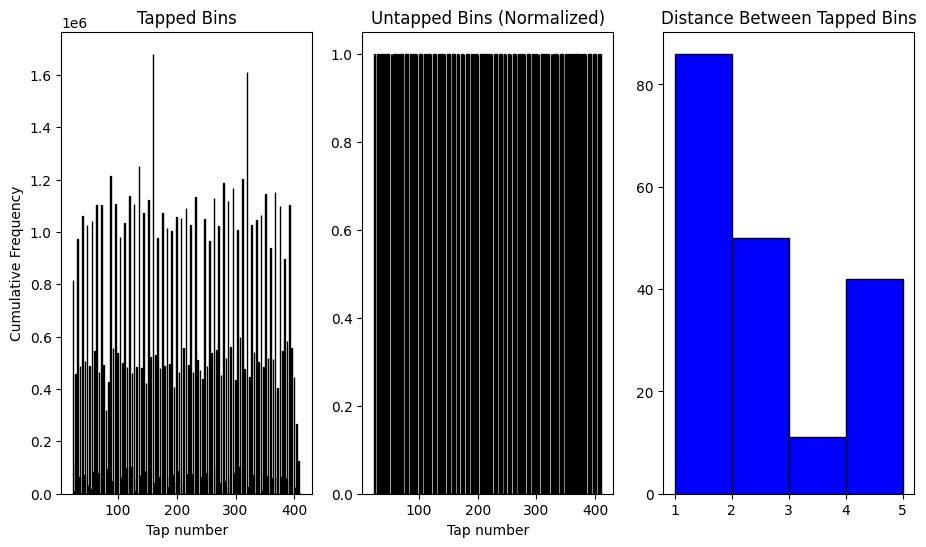

In [4]:
# Load the data
file_path = "/content/drive/My Drive/TTMU_SaveData/250422/Unsync1_Ch2_Z3_1_POR1.csv"
data, file_path = read_and_print.load_csv(file_path)
print(f"\nData loaded from the csv file: {file_path}'.\n")

# Identify the tapped / untapped bins
full_range, present_taps1, missing_taps = read_and_print.identify_sets(data)
print(f"There are {len(present_taps1)} tapped bins and {len(missing_taps)} untapped"
    f" = {len(present_taps1)+len(missing_taps)} = {len(full_range)}\n")
print(f"Tapped is: {100 * len(present_taps1) / len(full_range):.2f}% \n")

# Print Taps
bin1, freq1 = read_and_print.print_taps(data, present_taps1, missing_taps)

## 2) Carry out the POR & error lib construction

In [5]:
""" Present bins """

# Check raw 'present_taps'
print(f"Present taps: \n {present_taps1} \n")


# Feed to the TDL
TDL2_Z3_1.feed_physical_nums(present_taps1, 1, verbose = True)


# POR
TDL2_Z3_1.perform_POR()
to_print1 = TDL2_Z3_1.get_logical_assignments()
error_lib1 = TDL2_Z3_1.build_initial_error_lib()


Present taps: 
 [ 23  25  26  27  31  33  34  35  37  39  42  43  47  49  50  51  53  55
  57  58  59  63  66  67  71  73  74  75  79  81  82  83  87  90  91  95
  97  98  99 103 105 106 107 111 113 114 115 119 121 122 123 127 129 130
 131 135 137 138 139 143 145 146 147 149 151 153 154 155 159 161 162 163
 167 169 170 171 175 177 178 179 183 185 186 187 191 193 194 195 199 201
 202 203 207 210 211 215 217 218 219 223 225 226 227 231 233 234 235 239
 242 243 247 249 250 251 255 257 258 259 263 266 267 271 273 274 275 277
 279 281 282 283 287 289 290 291 295 297 298 299 301 303 305 306 307 311
 314 315 319 321 322 323 325 327 330 331 335 337 338 339 343 345 346 347
 351 353 354 355 359 362 363 367 370 371 375 377 378 379 383 385 386 387
 391 393 394 395 399 401 402 403 407 410] 

Trial 0 data processed and added to unique history. 


--------------------------------------------------------------------------------------------------------
🟡 Running 'get_logical_assignments' in 'TDL_Class'

##3) Results

In [6]:
# Show Results

print("POR result: \n")
for i,j in TDL2_Z3_1.POR_result.items():
  print(f"{i}:{j}")

print("\nLogical bin assignment: \n")
print(f"{TDL2_Z3_1.logical_assignment}")
print(f"{to_print1}")

POR result: 

((np.int64(8),),):[8]
((np.int64(2), np.int64(3), np.int64(4), np.int64(8)),):[2, 1, np.int64(3), 8, 4, 6, 7, 5]
((np.int64(2), np.int64(3), np.int64(4), np.int64(6), np.int64(8)),):[2, 1, np.int64(3), 8, 4, 6, 5, 7]
((np.int64(3), np.int64(4), np.int64(8)),):[2, 3, 1, 8, np.int64(4), 6, 7, 5]
((np.int64(3),),):[2, 3, 1, 8, 6, 5, 7, np.int64(4)]

Logical bin assignment: 

{0: np.int64(3200), 1: np.int64(3201), 2: np.int64(3202), 3: np.int64(3203), 4: np.int64(3204), 5: np.int64(3205), 6: np.int64(3206), 7: np.int64(3207), 8: np.int64(3224), 9: np.int64(3225), 10: np.int64(3226), 11: np.int64(3227), 12: np.int64(3228), 13: np.int64(3229), 14: np.int64(3230), 15: np.int64(3231), 16: np.int64(3248), 17: np.int64(3249), 18: np.int64(3250), 19: np.int64(3251), 20: np.int64(3252), 21: np.int64(3253), 22: np.int64(3254), 23: np.int64(3255), 24: np.int64(3272), 25: np.int64(3273), 26: np.int64(3274), 27: np.int64(3275), 28: np.int64(3276), 29: np.int64(3277), 30: np.int64(3278), 

#POR 2

In [ ]:
!test -f "/content/drive/My Drive/TTMU_SaveData/250422/Unsync1_Ch2_Z3_1_POR2.csv" && echo "File exists" || echo "File not found"

File exists


## 1) Data Loading


Data loaded from the csv file: /content/drive/My Drive/TTMU_SaveData/250422/Unsync1_Ch2_Z3_1_POR2.csv'.

There are 362 tapped bins and 29 untapped = 391 = 391

Tapped is: 92.58% 



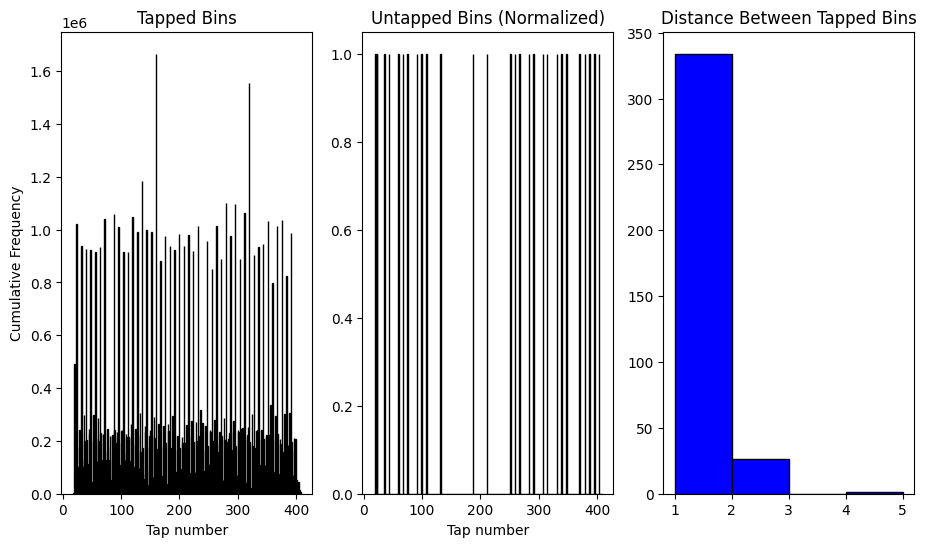

In [7]:
# Load the data
file_path = "/content/drive/My Drive/TTMU_SaveData/250422/Unsync1_Ch2_Z3_1_POR2.csv"
data, file_path = read_and_print.load_csv(file_path)
print(f"\nData loaded from the csv file: {file_path}'.\n")

# Identify the tapped / untapped bins
full_range, present_taps2, missing_taps = read_and_print.identify_sets(data)
print(f"There are {len(present_taps2)} tapped bins and {len(missing_taps)} untapped"
    f" = {len(present_taps2)+len(missing_taps)} = {len(full_range)}\n")
print(f"Tapped is: {100 * len(present_taps2) / len(full_range):.2f}% \n")

# Print Taps
bin2, freq2 = read_and_print.print_taps(data, present_taps2, missing_taps)

## 2) Carry out 'next_POR_n_error_lib'

In [10]:
""" Present bins """

# Check raw 'present_taps'
print(f"Present taps: \n {present_taps2} \n")


# Feed to the TDL
TDL2_Z3_1.feed_physical_nums(present_taps2, 2)


# POR
error_lib2 = TDL2_Z3_1.next_POR_n_error_lib(error_lib1, 2)
to_print2 = TDL2_Z3_1.get_logical_assignments()

Present taps: 
 [ 17  18  19  23  24  25  26  27  28  29  30  31  32  33  34  36  37  38
  39  40  41  42  44  45  46  47  48  49  50  51  52  53  54  55  56  57
  58  60  61  62  63  64  65  66  68  69  70  71  72  73  74  76  77  78
  79  80  81  82  83  84  85  86  87  88  89  90  92  93  94  95  96  97
  98 100 101 102 103 104 105 106 108 109 110 111 112 113 114 115 116 117
 118 119 120 121 122 123 124 125 126 127 128 129 130 132 133 134 135 136
 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154
 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172
 173 174 175 176 177 178 179 180 181 182 183 184 185 186 188 189 190 191
 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209
 210 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228
 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246
 247 248 249 250 252 253 254 255 256 257 258 260 261 262 263 264 265 266
 268 269 270 271 272 273 274 275 27

##3) Results

In [11]:
# Show Results

print("POR result: \n")
for i,j in TDL2_Z3_1.POR_result.items():
  print(f"{i}:{j}")

print("\nLogical bin assignment: \n")
print(f"{TDL2_Z3_1.logical_assignment}")
print(f"{to_print2}")

POR result: 

((np.int64(2), np.int64(3), np.int64(4), np.int64(8)), (np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8))):(2, 1, np.int64(3), 8, 4, 6, 7, 5)
((np.int64(2), np.int64(3), np.int64(4), np.int64(6), np.int64(8)), (np.int64(1), np.int64(2), np.int64(3), np.int64(5), np.int64(6), np.int64(7), np.int64(8))):(2, 1, np.int64(3), 4, 8, 6, 5, 7)
((np.int64(3), np.int64(4), np.int64(8)), (np.int64(1), np.int64(2), np.int64(3), np.int64(5), np.int64(6), np.int64(7), np.int64(8))):(2, 3, 1, np.int64(4), 8, 6, 7, 5)
((np.int64(2), np.int64(3), np.int64(4), np.int64(6), np.int64(8)), (np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8))):(2, 1, np.int64(3), 8, 4, 6, 5, 7)
((np.int64(2), np.int64(3), np.int64(4), np.int64(8)), (np.int64(1), np.int64(2), np.int64(3), np.int64(5), np.int64(6), np.int64(7), np.int64(8))):(2, 1, np.int64(3), 4, 8, 6, 7, 5)
((np.int64(3), np.int64(4), np.i

# POR3

In [ ]:
!test -f "/content/drive/My Drive/TTMU_SaveData/250422/Unsync1_Ch2_Z3_1_POR3.csv" && echo "File exists" || echo "File not found"

File exists


## 1) Data Loading


Data loaded from the csv file: /content/drive/My Drive/TTMU_SaveData/250422/Unsync1_Ch2_Z3_1_POR3.csv'.

There are 388 tapped bins and 3 untapped = 391 = 391

Tapped is: 99.23% 



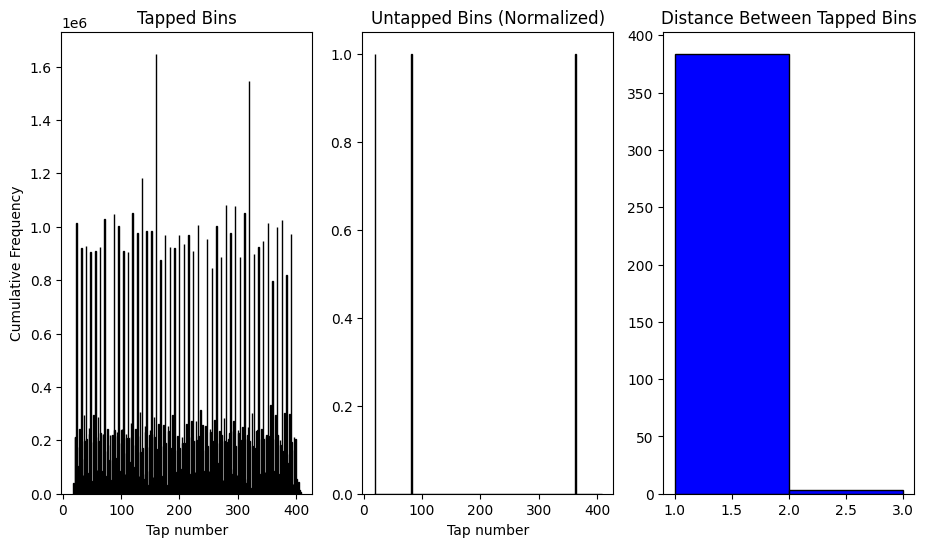

In [12]:
# Load the data
file_path = "/content/drive/My Drive/TTMU_SaveData/250422/Unsync1_Ch2_Z3_1_POR3.csv"
data, file_path = read_and_print.load_csv(file_path)
print(f"\nData loaded from the csv file: {file_path}'.\n")

# Identify the tapped / untapped bins
full_range, present_taps3, missing_taps = read_and_print.identify_sets(data)
print(f"There are {len(present_taps3)} tapped bins and {len(missing_taps)} untapped"
    f" = {len(present_taps3)+len(missing_taps)} = {len(full_range)}\n")
print(f"Tapped is: {100 * len(present_taps3) / len(full_range):.2f}% \n")

# Print Taps
bin3, freq3 = read_and_print.print_taps(data, present_taps3, missing_taps)

## 2) Carry out 'next_POR_n_error_lib'

In [ ]:
""" Present bins """

# Check raw 'present_taps'
print(f"Present taps: \n {present_taps3} \n")


# Feed to the TDL
TDL1_Z3_1.feed_physical_nums(present_taps3, 3)


# POR
error_lib3 = TDL1_Z3_1.next_POR_n_error_lib(error_lib2, 3)
to_print3 = TDL1_Z3_1.get_logical_assignments()

Present taps: 
 [ 15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32
  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50
  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68
  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86
  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104
 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122
 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140
 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158
 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176
 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194
 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212
 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230
 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248
 249 250 251 252 253 254 255 256 25

##3) Results

In [ ]:
# Show Results

print("POR result: \n")
for i,j in TDL1_Z3_1.POR_result.items():
  print(f"{i}:{j}")

print("\nLogical bin assignment: \n")
print(f"{TDL1_Z3_1.logical_assignment}")
print(f"{to_print3}")

POR result: 

((np.int64(8),), (np.int64(8),), (np.int64(8),)):(8,)
((np.int64(3), np.int64(4), np.int64(8)), (np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)), (np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8))):(2, 3, 1, 8, np.int64(4), 6, 7, 5)
((np.int64(3), np.int64(4), np.int64(8)), (np.int64(1), np.int64(2), np.int64(3), np.int64(5), np.int64(6), np.int64(7), np.int64(8)), (np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8))):(2, 3, 1, np.int64(4), 8, 6, 7, 5)
((np.int64(2), np.int64(3), np.int64(4), np.int64(6), np.int64(8)), (np.int64(1), np.int64(2), np.int64(3), np.int64(5), np.int64(6), np.int64(7), np.int64(8)), (np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8))):(2, 1, np.int64(3), 4, 8, 6, 5, 7)
((np.int64(2), np.int64(3), np.int64(4), np.int64(8)), (np.int64(

# Code Density Test

In [13]:
cdc_width, cdc_to_pass = ITI.get_bin_widths(bin3, freq3, to_print2)

# Save this into a .npz file
np.savez("/content/drive/MyDrive/TTMU_Colab_Notebooks/Calibrations/data/TDL2_Z3_1.npz", cdc_to_pass = cdc_to_pass)

In [14]:
print(cdc_to_pass)

{np.int64(3250): np.float64(0.0058588900736735346), np.int64(3255): np.float64(1.846920597498587), np.int64(3251): np.float64(0.0), np.int64(3253): np.float64(10.07781066696695), np.int64(3254): np.float64(10.042326582730428), np.int64(3252): np.float64(1.2302251681309502), np.int64(3273): np.float64(47.840388903673265), np.int64(3272): np.float64(8.220826008293423), np.int64(3274): np.float64(0.5044315356978923), np.int64(3279): np.float64(4.9226961388367005), np.int64(3275): np.float64(0.9643071573677675), np.int64(3277): np.float64(11.406077745604938), np.int64(3278): np.float64(10.806297498869359), np.int64(3276): np.float64(1.1933708596030037), np.int64(3297): np.float64(43.47598828992146), np.int64(3296): np.float64(6.159630681084277), np.int64(3298): np.float64(3.0314086237640856), np.int64(3299): np.float64(3.326999077803615), np.int64(3303): np.float64(1.53011529149874), np.int64(3301): np.float64(13.866906074774818), np.int64(3300): np.float64(9.414244117009925), np.int64(330

In [15]:
print(to_print2)

{0: np.int64(3200), 1: np.int64(3201), 2: np.int64(3202), 3: np.int64(3203), 4: np.int64(3204), 5: np.int64(3205), 6: np.int64(3206), 7: np.int64(3207), 8: np.int64(3224), 9: np.int64(3225), 10: np.int64(3226), 11: np.int64(3227), 12: np.int64(3228), 13: np.int64(3229), 14: np.int64(3230), 15: np.int64(3231), 16: np.int64(3248), 17: np.int64(3249), 18: np.int64(3250), 19: np.int64(3255), 20: np.int64(3251), 21: np.int64(3253), 22: np.int64(3254), 23: np.int64(3252), 24: np.int64(3273), 25: np.int64(3272), 26: np.int64(3274), 27: np.int64(3279), 28: np.int64(3275), 29: np.int64(3277), 30: np.int64(3278), 31: np.int64(3276), 32: np.int64(3297), 33: np.int64(3296), 34: np.int64(3298), 35: np.int64(3299), 36: np.int64(3303), 37: np.int64(3301), 38: np.int64(3300), 39: np.int64(3302), 40: np.int64(3321), 41: np.int64(3322), 42: np.int64(3320), 43: np.int64(3323), 44: np.int64(3327), 45: np.int64(3325), 46: np.int64(3326), 47: np.int64(3324), 48: np.int64(3345), 49: np.int64(3344), 50: np.in

In [16]:
print(bin3)
print(present_taps3)
print(freq3)

[ 17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.  29.  30.
  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.  43.  44.
  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.  56.  57.  58.
  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.  70.  71.  72.
  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.  84.  85.  86.
  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.  98.  99. 100.
 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111. 112. 113. 114.
 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125. 126. 127. 128.
 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139. 140. 141. 142.
 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153. 154. 155. 156.
 157. 158. 159. 160. 161. 162. 163. 164. 165. 166. 167. 168. 169. 170.
 171. 172. 173. 174. 175. 176. 177. 178. 179. 180. 181. 182. 183. 184.
 185. 186. 187. 188. 189. 190. 191. 192. 193. 194. 195. 196. 197. 198.
 199. 200. 201. 202. 203. 204. 205. 206. 207. 208. 209. 210. 211. 212.
 213. 

# Endpoint - to print out

In [ ]:
read_and_print.vivado_print_bin_assignment(to_print2, 1)

Type the ID for this txt file (e.g. '25_02_14'): 25_04_22_POR3
The text file has been created in this directory under the name: Bin_sequence_25_04_22_POR3.txt.


In [ ]:
files.download("Bin_sequence_25_04_22_POR3.txt")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
final_outcome_of_notebook = to_print3

In [ ]:
read_and_print.vivado_print_bin_assignment(to_print3, 1)

# Debug Prison

In [9]:
r1,s,e = utils.split_into_cells(present_taps1, logical_assignment = TDL2_Z3_1.logical_assignment, TDL_start = TDL2_Z3_1.TDL_start)
print(f"Starting Cell num: {s}, Ending Cell num: {e}")

for i,j in r1.items():
  print(f"{i}:{j}")

Starting Cell num: 7, Ending Cell num: 154
7:[np.int64(8)]
10:[np.int64(2), np.int64(3), np.int64(4), np.int64(8)]
13:[np.int64(2), np.int64(3), np.int64(4), np.int64(6), np.int64(8)]
16:[np.int64(3), np.int64(4), np.int64(8)]
19:[np.int64(2), np.int64(3), np.int64(4), np.int64(6), np.int64(8)]
22:[np.int64(2), np.int64(3), np.int64(4), np.int64(8)]
25:[np.int64(3), np.int64(4), np.int64(8)]
28:[np.int64(2), np.int64(3), np.int64(4), np.int64(8)]
31:[np.int64(2), np.int64(3), np.int64(4), np.int64(8)]
34:[np.int64(3), np.int64(4), np.int64(8)]
37:[np.int64(2), np.int64(3), np.int64(4), np.int64(8)]
40:[np.int64(2), np.int64(3), np.int64(4), np.int64(8)]
43:[np.int64(2), np.int64(3), np.int64(4), np.int64(8)]
46:[np.int64(2), np.int64(3), np.int64(4), np.int64(8)]
49:[np.int64(2), np.int64(3), np.int64(4), np.int64(8)]
52:[np.int64(2), np.int64(3), np.int64(4), np.int64(8)]
55:[np.int64(2), np.int64(3), np.int64(4), np.int64(6), np.int64(8)]
58:[np.int64(2), np.int64(3), np.int64(4), np

In [ ]:
r2,s,e = utils.split_into_cells(present_taps2, logical_assignment = TDL2_Z3_1.logical_assignment, TDL_start = TDL2_Z3_1.TDL_start)
print(f"Starting Cell num: {s}. Ending Cell num {e}")

for i,j in r2.items():
  print(f"{i}:{j}")

Starting Cell num: 7. Ending Cell num 151
7:[np.int64(2), np.int64(3), np.int64(4), np.int64(8)]
10:[np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
13:[np.int64(1), np.int64(2), np.int64(3), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
16:[np.int64(1), np.int64(2), np.int64(3), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
19:[np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
22:[np.int64(1), np.int64(2), np.int64(3), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
25:[np.int64(1), np.int64(2), np.int64(3), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
28:[np.int64(1), np.int64(2), np.int64(3), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
31:[np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
34:[np.int64(1), np.int64(2), np.int64(3), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
37:[np.in

In [ ]:
r3,s,e = utils.split_into_cells(present_taps3, logical_assignment = TDL2_Z3_1.logical_assignment, TDL_start = TDL2_Z3_1.TDL_start)
print(f"Starting Cell num: {s}, Ending Cell num: {e}")

for i,j in r3.items():
  print(f"{i}:{j}")

Starting Cell num: 7, Ending Cell num: 151
7:[np.int64(2), np.int64(3), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
10:[np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
13:[np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
16:[np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
19:[np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
22:[np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
25:[np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
28:[np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
31:[np.int64(1), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
34:[np.int64(1), np.int64

In [ ]:
for i,j in TDL2_Z3_1.POR_result.items():
  print(f"{i}:{j}")

(np.int64(2), np.int64(3), np.int64(4), np.int64(8)):[2, np.int64(3), 8, 4, 6, 7, 5]
((np.int64(2), np.int64(3), np.int64(4), np.int64(8)), (np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8))):(2, 1, np.int64(3), 8, 4, 6, 7, 5)
((np.int64(2), np.int64(3), np.int64(4), np.int64(6), np.int64(8)), (np.int64(1), np.int64(2), np.int64(3), np.int64(5), np.int64(6), np.int64(7), np.int64(8))):(2, 1, np.int64(3), 4, 8, 6, 5, 7)
((np.int64(3), np.int64(4), np.int64(8)), (np.int64(1), np.int64(2), np.int64(3), np.int64(5), np.int64(6), np.int64(7), np.int64(8))):(2, 3, 1, np.int64(4), 8, 6, 7, 5)
((np.int64(2), np.int64(3), np.int64(4), np.int64(6), np.int64(8)), (np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8))):(2, 1, np.int64(3), 8, 4, 6, 5, 7)
((np.int64(2), np.int64(3), np.int64(4), np.int64(8)), (np.int64(1), np.int64(2), np.int64(3), np.int64(5), np.int64(6), np.int64(7), np.int64(8

In [ ]:
code_density_test = freq3 / np.sum(freq3) * 4000  # in units of ps
for i in code_density_test:
  print(i)

0.0058588900736735346
1.846920597498587
0.0
10.07781066696695
10.042326582730427
1.2302251681309502
47.840388903673265
8.220826008293423
0.5044315356978923
4.9226961388367005
0.9643071573677674
11.406077745604938
10.806297498869359
1.1933708596030037
43.47598828992145
6.159630681084277
3.0314086237640856
3.326999077803615
1.53011529149874
13.866906074774816
9.414244117009925
0.0684639654576851
43.758018248387245
9.621100735901399
0.7119968912918266
3.66431049906132
1.611431015827709
11.602775805094478
10.585266145928674
2.036484040850024
42.85801713448939
9.234130496357961
1.4990726239309695
2.2284099398763297
0.10026261884141323
13.894452307943782
10.89096791025664
0.9916643940827432
43.0337838366996
9.964649040140756
0.7713890269580171
4.2753832839227695
1.638599256088695
13.625557603030265
9.414669359031402
3.2853726088124344
43.64126568893525
10.715059460705943
1.9451515044596135
3.991888602938566
1.801608697654612
10.53848952356628
10.436147943730983
0.8676354711521541
48.54784988

In [ ]:
len(np.where(code_density_test < 0.5)[0]) # Get rid of these ones; these post processing can be done later during ITI.

38

# Reload (same thing)

In [ ]:
# Reload modules
importlib.reload(utils)
importlib.reload(Cell_Class)
importlib.reload(TDL_Class)
importlib.reload(UniqueHistory_Class)
importlib.reload(read_and_print)
importlib.reload(initialize)

# # Re-import all functions explicitly
# from utils import *
# from Cell_Class import *
# from TDL_Class import *
# from UniqueHistory_Class import *
# from read_and_print import *
# from initialize import *


<module 'initialize' from '/content/drive/MyDrive/TTMU_Colab_Notebooks/Calibrations/src_class/initialize.py'>